### **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import seaborn as sns

### **Dataset Configuration**

In [2]:
dataset_dir = 'batik_jogja'
batch_size = 32
img_size = (224, 224)
EPOCHS = 100

### **Load Dataset**

In [3]:
print("Loading dataset...")

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)

class_names = dataset.class_names
print("Kelas ditemukan:", class_names)

Loading dataset...
Found 1350 files belonging to 6 classes.
Using 1080 files for training.
Found 1350 files belonging to 6 classes.
Using 270 files for validation.
Kelas ditemukan: ['batik_ceplok', 'batik_kawung', 'batik_nitik', 'batik_parang', 'batik_sidoluhur', 'batik_truntum']


### **Build EfficientNetB0 Model**

In [4]:
print("Building model...")

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=img_size + (3,),
    pooling='avg'
)

base_model.trainable = False

inputs = tf.keras.Input(shape=img_size + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### **Callbacks Setup**

In [5]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_batik_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

### **Start Model Training**

In [6]:
print("Starting training...")

history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

Starting training...
Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.3670 - loss: 1.5825
Epoch 1: val_accuracy improved from -inf to 0.71481, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 720ms/step - accuracy: 0.3713 - loss: 1.5760 - val_accuracy: 0.7148 - val_loss: 0.9954 - learning_rate: 0.0010
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.7156 - loss: 0.9325
Epoch 2: val_accuracy improved from 0.71481 to 0.76667, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 686ms/step - accuracy: 0.7165 - loss: 0.9308 - val_accuracy: 0.7667 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.7602 - loss: 0.7459
Epoch 3: val_accuracy improved from 0.76667 to 0.79630, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 669ms/step - accuracy: 0.7609 - loss: 0.7447 - val_accuracy: 0.7963 - val_loss: 0.6709 - learning_rate: 0.0010
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.8052 - loss: 0.6292
Epoch 4: val_accuracy improved from 0.79630 to 0.80000, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 700ms/step - accuracy: 0.8054 - loss: 0.6290 - val_accuracy: 0.8000 - val_loss: 0.6190 - learning_rate: 0.0010
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8295 - loss: 0.5626
Epoch 5: val_accuracy improved from 0.80000 to 0.80370, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 672ms/step - accuracy: 0.8297 - loss: 0.5624 - val_accuracy: 0.8037 - val_loss: 0.5860 - learning_rate: 0.0010
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.8563 - loss: 0.4945
Epoch 6: val_accuracy improved from 0.80370 to 0.81481, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 688ms/step - accuracy: 0.8562 - loss: 0.4947 - val_accuracy: 0.8148 - val_loss: 0.5562 - learning_rate: 0.0010
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.8524 - loss: 0.4908
Epoch 7: val_accuracy improved from 0.81481 to 0.82593, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 675ms/step - accuracy: 0.8528 - loss: 0.4902 - val_accuracy: 0.8259 - val_loss: 0.5355 - learning_rate: 0.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.8735 - loss: 0.4536
Epoch 8: val_accuracy did not improve from 0.82593
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 693ms/step - accuracy: 0.8736 - loss: 0.4531 - val_accuracy: 0.8185 - val_loss: 0.5220 - learning_rate: 0.0010
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.8831 - loss: 0.4255
Epoch 9: val_accuracy did not improve from 0.82593
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 682ms/step - accuracy: 0.8832 - loss: 0.4251 - val_accuracy: 0.8259 - val_loss: 0.5039 - learning_rate: 0.0010
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.8912 - loss: 0.3889
Epoch 10: val_accuracy did not improve from 0.82593
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 691ms/step - accuracy: 0.8911 - loss: 0.3889 - val_accuracy: 0.8222 - val_loss: 0.5012 - learning_rate: 0.0010
Epoch 11/100
34/

34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 696ms/step - accuracy: 0.9040 - loss: 0.3577 - val_accuracy: 0.8296 - val_loss: 0.5020 - learning_rate: 0.0010
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.8866 - loss: 0.3576
Epoch 12: val_accuracy did not improve from 0.82963
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 672ms/step - accuracy: 0.8871 - loss: 0.3571 - val_accuracy: 0.8259 - val_loss: 0.4820 - learning_rate: 0.0010
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.9116 - loss: 0.3397
Epoch 13: val_accuracy improved from 0.82963 to 0.83333, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 725ms/step - accuracy: 0.9115 - loss: 0.3394 - val_accuracy: 0.8333 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9011 - loss: 0.3355
Epoch 14: val_accuracy improved from 0.83333 to 0.84444, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 716ms/step - accuracy: 0.9015 - loss: 0.3349 - val_accuracy: 0.8444 - val_loss: 0.4721 - learning_rate: 0.0010
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9170 - loss: 0.3089
Epoch 15: val_accuracy did not improve from 0.84444
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 701ms/step - accuracy: 0.9171 - loss: 0.3087 - val_accuracy: 0.8407 - val_loss: 0.4639 - learning_rate: 0.0010
Epoch 16/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.9177 - loss: 0.3099
Epoch 16: val_accuracy did not improve from 0.84444
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 691ms/step - accuracy: 0.9181 - loss: 0.3094 - val_accuracy: 0.8407 - val_loss: 0.4750 - learning_rate: 0.0010
Epoch 17/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9249 - loss: 0.2825
Epoch 17: val_accuracy did not improve from 0.84444
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 695ms/step - accuracy: 0.9248 - loss: 0.2825 - val_accuracy: 0.8444 - val_loss: 0.4561 - learning_rate: 0.0010
Epoch 18/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 721ms/step - accuracy: 0.9222 - loss: 0.2861 - val_accuracy: 0.8556 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 19/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9307 - loss: 0.2676
Epoch 19: val_accuracy did not improve from 0.85556
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 695ms/step - accuracy: 0.9309 - loss: 0.2672 - val_accuracy: 0.8556 - val_loss: 0.4503 - learning_rate: 0.0010
Epoch 20/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9377 - loss: 0.2578
Epoch 20: val_accuracy improved from 0.85556 to 0.85926, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 687ms/step - accuracy: 0.9377 - loss: 0.2576 - val_accuracy: 0.8593 - val_loss: 0.4482 - learning_rate: 0.0010
Epoch 21/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9290 - loss: 0.2587
Epoch 21: val_accuracy did not improve from 0.85926
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 689ms/step - accuracy: 0.9291 - loss: 0.2582 - val_accuracy: 0.8593 - val_loss: 0.4491 - learning_rate: 0.0010
Epoch 22/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9330 - loss: 0.2470
Epoch 22: val_accuracy did not improve from 0.85926
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 702ms/step - accuracy: 0.9330 - loss: 0.2467 - val_accuracy: 0.8556 - val_loss: 0.4432 - learning_rate: 0.0010
Epoch 23/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9452 - loss: 0.2306
Epoch 23: val_accuracy did not improve from 0.85926
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 733ms/step - accuracy: 0.9453 - loss: 0.2303 - val_accuracy: 0.8593 - val_loss: 0.4333 - learning_rate: 0.0010
Epoch 24/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 697ms/step - accuracy: 0.9483 - loss: 0.2182 - val_accuracy: 0.8667 - val_loss: 0.4327 - learning_rate: 0.0010
Epoch 27/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.9412 - loss: 0.2253
Epoch 27: val_accuracy did not improve from 0.86667
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 717ms/step - accuracy: 0.9414 - loss: 0.2246 - val_accuracy: 0.8630 - val_loss: 0.4356 - learning_rate: 0.0010
Epoch 28/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9481 - loss: 0.2180
Epoch 28: val_accuracy did not improve from 0.86667
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 727ms/step - accuracy: 0.9484 - loss: 0.2172 - val_accuracy: 0.8630 - val_loss: 0.4338 - learning_rate: 0.0010
Epoch 29/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9577 - loss: 0.2008
Epoch 29: val_accuracy improved from 0.86667 to 0.87037, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 711ms/step - accuracy: 0.9579 - loss: 0.2004 - val_accuracy: 0.8704 - val_loss: 0.4318 - learning_rate: 0.0010
Epoch 30/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.9491 - loss: 0.2113
Epoch 30: val_accuracy did not improve from 0.87037
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 696ms/step - accuracy: 0.9493 - loss: 0.2106 - val_accuracy: 0.8667 - val_loss: 0.4256 - learning_rate: 0.0010
Epoch 31/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9600 - loss: 0.1724
Epoch 31: val_accuracy did not improve from 0.87037
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 702ms/step - accuracy: 0.9600 - loss: 0.1725 - val_accuracy: 0.8630 - val_loss: 0.4267 - learning_rate: 0.0010
Epoch 32/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.9635 - loss: 0.1624
Epoch 32: val_accuracy improved from 0.87037 to 0.87778, saving model to best_batik_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 711ms/step - accuracy: 0.9635 - loss: 0.1627 - val_accuracy: 0.8778 - val_loss: 0.4181 - learning_rate: 0.0010
Epoch 33/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9539 - loss: 0.1889
Epoch 33: val_accuracy did not improve from 0.87778
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 689ms/step - accuracy: 0.9542 - loss: 0.1884 - val_accuracy: 0.8667 - val_loss: 0.4217 - learning_rate: 0.0010
Epoch 34/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9633 - loss: 0.1822
Epoch 34: val_accuracy did not improve from 0.87778
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 706ms/step - accuracy: 0.9634 - loss: 0.1817 - val_accuracy: 0.8556 - val_loss: 0.4300 - learning_rate: 0.0010
Epoch 35/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9475 - loss: 0.1829
Epoch 35: val_accuracy did not improve from 0.87778
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 702ms/step - accuracy: 0.9478 - loss: 0.1824 - val_accuracy: 0.8741 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 36/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 775ms/step - accuracy: 0.9671 - loss: 0.1631 - val_accuracy: 0.8815 - val_loss: 0.4210 - learning_rate: 0.0010
Epoch 40/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.9720 - loss: 0.1473
Epoch 40: val_accuracy did not improve from 0.88148
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 769ms/step - accuracy: 0.9720 - loss: 0.1472 - val_accuracy: 0.8667 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 41/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.9619 - loss: 0.1663
Epoch 41: val_accuracy did not improve from 0.88148
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 740ms/step - accuracy: 0.9622 - loss: 0.1656 - val_accuracy: 0.8704 - val_loss: 0.4125 - learning_rate: 0.0010
Epoch 42/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.9605 - loss: 0.1641
Epoch 42: val_accuracy did not improve from 0.88148
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 741ms/step - accuracy: 0.9608 - loss: 0.1635 - val_accuracy: 0.8815 - val_loss: 0.4142 - learning_rate: 0.0010
Epoch 43/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 746ms/step - accuracy: 0.9699 - loss: 0.1404 - val_accuracy: 0.8889 - val_loss: 0.4160 - learning_rate: 0.0010
Epoch 52/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.9720 - loss: 0.1294
Epoch 52: val_accuracy did not improve from 0.88889
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 746ms/step - accuracy: 0.9721 - loss: 0.1291 - val_accuracy: 0.8815 - val_loss: 0.4206 - learning_rate: 0.0010
Epoch 53/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.9746 - loss: 0.1198
Epoch 53: val_accuracy did not improve from 0.88889
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 731ms/step - accuracy: 0.9747 - loss: 0.1197 - val_accuracy: 0.8889 - val_loss: 0.4154 - learning_rate: 0.0010
Epoch 54/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9685 - loss: 0.1312
Epoch 54: val_accuracy did not improve from 0.88889
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 764ms/step - accuracy: 0.9686 - loss: 0.1308 - val_accuracy: 0.8852 - val_loss: 0.4119 - learning_rate: 0.0010
Epoch 55/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 889ms/step - accuracy: 0.9875 - loss: 0.0956 - val_accuracy: 0.8926 - val_loss: 0.4078 - learning_rate: 0.0010
Epoch 64/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9761 - loss: 0.0964
Epoch 64: val_accuracy did not improve from 0.89259
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 843ms/step - accuracy: 0.9761 - loss: 0.0964 - val_accuracy: 0.8778 - val_loss: 0.4125 - learning_rate: 0.0010
Epoch 65/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9679 - loss: 0.1125
Epoch 65: val_accuracy did not improve from 0.89259
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 876ms/step - accuracy: 0.9681 - loss: 0.1121 - val_accuracy: 0.8778 - val_loss: 0.4172 - learning_rate: 0.0010
Epoch 66/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9711 - loss: 0.1110
Epoch 66: val_accuracy did not improve from 0.89259
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 834ms/step - accuracy: 0.9713 - loss: 0.1104 - val_accuracy: 0.8778 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 67/100

### **Save Final Model**

In [7]:
model_path = 'batik_model_jogja_final_2.h5'
model.save(model_path)
print(f"✅ Model disimpan sebagai '{model_path}'")

✅ Model disimpan sebagai 'batik_model_jogja_final_2.h5'


### **Model Evaluation**

#### **1. Classification Report**

In [8]:
print("\n=== CLASSIFICATION REPORT ===")
y_true = []
y_pred = []

for batch_images, batch_labels in val_dataset:
    preds = model.predict(batch_images)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))


=== CLASSIFICATION REPORT ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
                 precision    recall  f1-score   support

   batik_ceplok       0.83      0.76      0.79        38
   batik_kawung       0.88      0.94      0.91        48
    batik_nitik       0.82      0.79      0.80        57
   batik_parang       1.00      0.98      0.99        43
batik_sidoluhur       0.79      0.86      0.83        36
  batik_truntum       0.92      0.92      0.92        48

       accuracy                           0.87       270
      macro avg       0.87      0.87      0.87       270
   weighted avg       0.87      0.87      0.87       270



#### **2. Training History Visualization**


=== TRAINING HISTORY ===


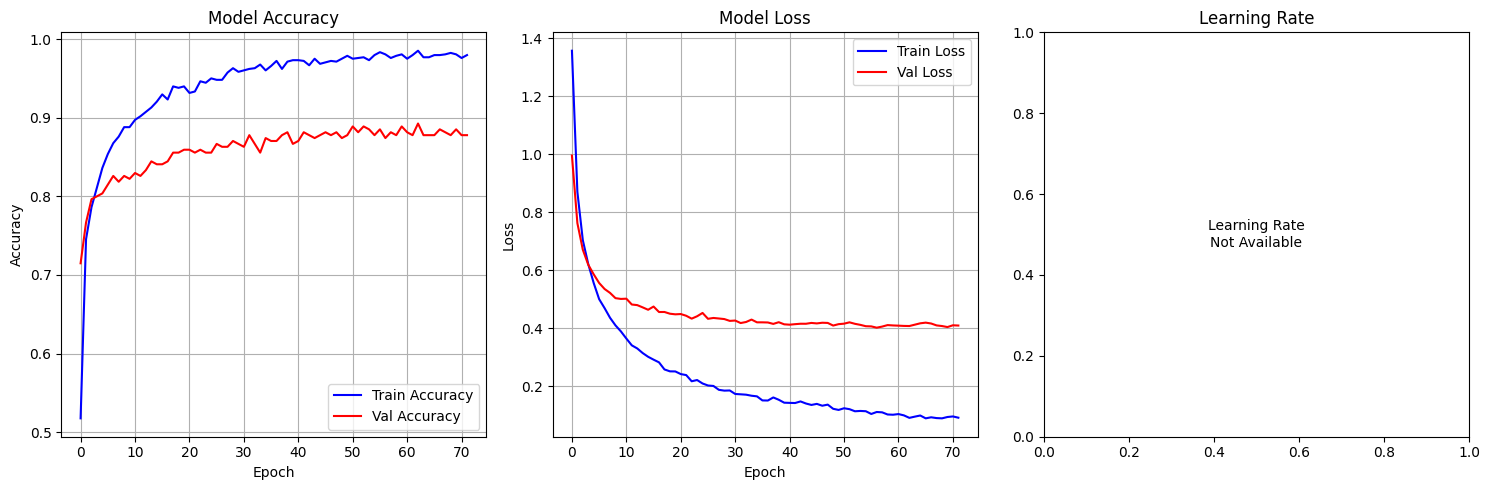

In [9]:
print("\n=== TRAINING HISTORY ===")
plt.figure(figsize=(15, 5))

# Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Learning Rate
plt.subplot(1, 3, 3)
if 'lr' in history.history:
    plt.plot(history.history['lr'], label='Learning Rate', color='green')
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Learning Rate\nNot Available',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.title('Learning Rate')

plt.tight_layout()
plt.show()

#### **3. Confusion Matrix**


=== CONFUSION MATRIX ===


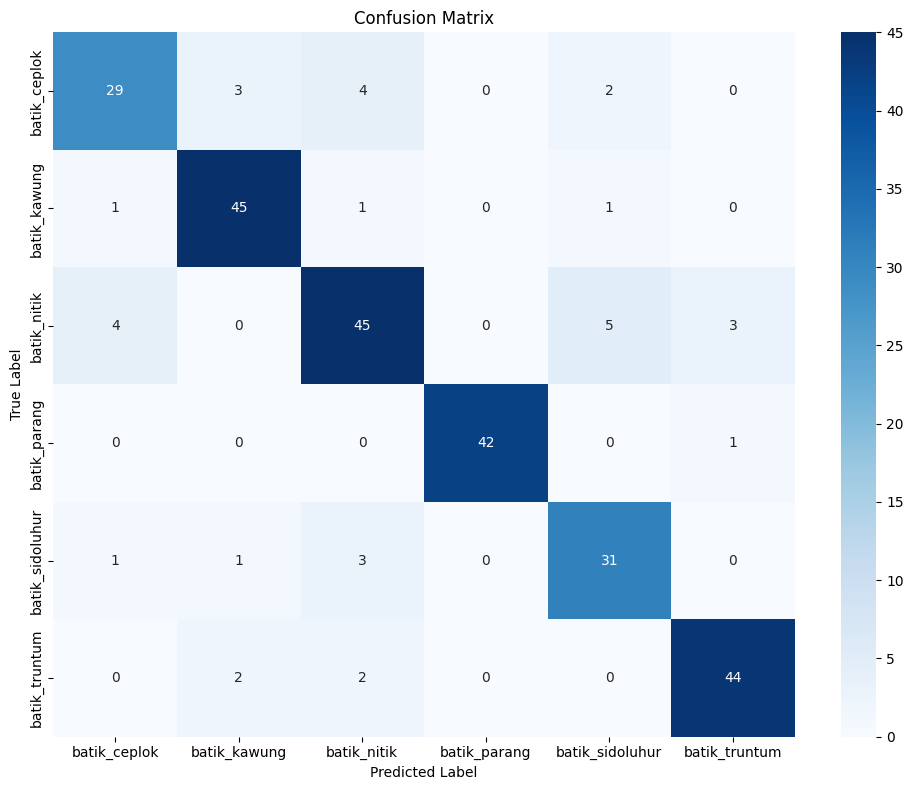


Total Samples: 270
Correct Predictions: 236
Overall Accuracy: 87.41%


In [10]:
print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Additional Metrics
print(f"\nTotal Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(np.array(y_true) == np.array(y_pred))}")
print(f"Overall Accuracy: {np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true) * 100:.2f}%")

### **Image Prediction Function**

In [11]:
def predict_image(model, img_path, class_names):
    """
    Prediksi gambar batik baru.
    
    Args:
        model: Model terlatih
        img_path: Path ke gambar
        class_names: Daftar nama kelas
    """
    try:
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array_exp = tf.expand_dims(img_array, 0)
        img_array_preprocessed = tf.keras.applications.efficientnet.preprocess_input(img_array_exp)

        predictions = model.predict(img_array_preprocessed)
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class] * 100

        # Display image with prediction
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
        plt.show()

        # Print prediction
        print("\n=== HASIL KLASIFIKASI ===")
        print(f"Motif Terdeteksi: {class_names[predicted_class]}")
        print(f"Confidence: {confidence:.2f}%")

        # Print all probabilities
        print("\nProbabilitas semua kelas:")
        for i, class_name in enumerate(class_names):
            prob = predictions[0][i] * 100
            print(f"{class_name}: {prob:.2f}%")

    except Exception as e:
        print(f"Error: {e}")
        print("Pastikan file gambar ada dan dapat dibaca.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


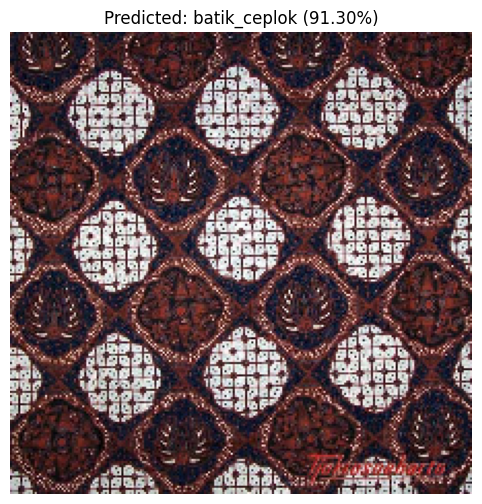


=== HASIL KLASIFIKASI ===
Motif Terdeteksi: batik_ceplok
Confidence: 91.30%

Probabilitas semua kelas:
batik_ceplok: 91.30%
batik_kawung: 5.41%
batik_nitik: 1.38%
batik_parang: 0.03%
batik_sidoluhur: 1.81%
batik_truntum: 0.07%


In [12]:
img_path = 'batik_ceplok_0162.jpg'
if os.path.exists(img_path):
    predict_image(model, img_path, class_names)
else:
    print(f"File {img_path} tidak ditemukan. Silakan ganti dengan path yang benar.")